In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
Y_train=tf.keras.utils.to_categorical(y_train)


In [5]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [6]:
print(X_train.shape)

(60000, 28, 28)


In [7]:
print(X_test.shape)

(10000, 28, 28)


In [8]:
import matplotlib.pyplot as plt
import cv2

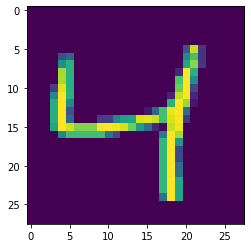

In [9]:
plt.imshow(X_train[2])

In [10]:
X_train=X_train.reshape(len(X_train),28,28,1)
X_test=X_test.reshape(len(X_test),28,28,1)

In [11]:
import sys, os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

In [12]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(X_train[0].shape)))     #layer performs the convolution it creates a convolution kernel which is convolved with the input layers to produce tensors of output
model.add(BatchNormalization())  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))  #creates pooling window to reduce dimensionality
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())  #it flattens ND array to 1D array

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0

In [14]:
model.compile(loss=categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train,batch_size=32,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1354 - accuracy: 0.9698
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1239 - accuracy: 0.9723
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1122 - accuracy: 0.9743
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1069 - accuracy: 0.9757
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1024 - accuracy: 0.9768
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0977 - accuracy: 0.9781
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9787
Epoch 8/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9797
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0841 - accuracy: 0.9811
Epoch 10/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.081

In [17]:
model.evaluate(X_train,Y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076 - accuracy: 0.9983


[0.007634250912815332, 0.9982666373252869]

In [20]:
Y_test=tf.keras.utils.to_categorical(y_test)

In [21]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0324 - accuracy: 0.9942


[0.03242241218686104, 0.9941999912261963]